In [1]:
# Import PyTorch and matplotlib
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.0.0'

In [2]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


In [3]:
x = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([[0], [0], [0], [1]], dtype=torch.float32)

In [4]:
if x.shape[0] == y.shape[0]:
    print("The shapes of our data match !")

The shapes of our data match !


In [5]:
class Perceptron(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Perceptron, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim) # takes in {input_dim}  features (X), produces {output_dim} features
        self.activation = torch.nn.Sigmoid()
        
    def forward(self, x):
        # x = self.linear(x)
        # x = self.activation(x)
        ## The upper line and lower are equivalent
        x =self.activation(self.linear(x)) #Takes in the computation through the linear layer and the resulting features of the linear layer through the activation
        return x


In [6]:
# Example usage:
model = Perceptron(2, 1)

In [8]:
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.2)

In [9]:
num_epochs = 4000
loss_values = []
for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred = model(x)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    # Print the loss every 100 epochs
    loss_values.append(loss.item()) # This is so that we can look at an image of our loss
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/4000], Loss: 0.3905
Epoch [200/4000], Loss: 0.2720
Epoch [300/4000], Loss: 0.2114
Epoch [400/4000], Loss: 0.1734
Epoch [500/4000], Loss: 0.1470
Epoch [600/4000], Loss: 0.1275
Epoch [700/4000], Loss: 0.1125
Epoch [800/4000], Loss: 0.1005
Epoch [900/4000], Loss: 0.0908
Epoch [1000/4000], Loss: 0.0828
Epoch [1100/4000], Loss: 0.0760
Epoch [1200/4000], Loss: 0.0702
Epoch [1300/4000], Loss: 0.0653
Epoch [1400/4000], Loss: 0.0609
Epoch [1500/4000], Loss: 0.0571
Epoch [1600/4000], Loss: 0.0537
Epoch [1700/4000], Loss: 0.0507
Epoch [1800/4000], Loss: 0.0480
Epoch [1900/4000], Loss: 0.0456
Epoch [2000/4000], Loss: 0.0434
Epoch [2100/4000], Loss: 0.0414
Epoch [2200/4000], Loss: 0.0396
Epoch [2300/4000], Loss: 0.0379
Epoch [2400/4000], Loss: 0.0363
Epoch [2500/4000], Loss: 0.0349
Epoch [2600/4000], Loss: 0.0336
Epoch [2700/4000], Loss: 0.0324
Epoch [2800/4000], Loss: 0.0312
Epoch [2900/4000], Loss: 0.0302
Epoch [3000/4000], Loss: 0.0292
Epoch [3100/4000], Loss: 0.0282
Epoch [3200/4000]

In [10]:
from typing import List
def plot_loss(loss_values: List[float]):
    plt.plot(loss_values)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss Curve')
    plt.show()

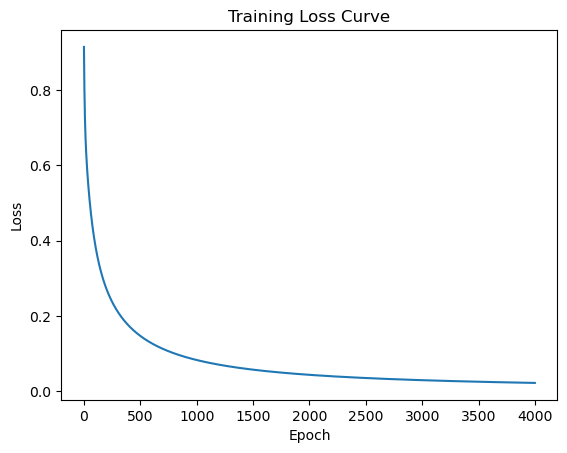

In [11]:
plot_loss(loss_values)

In [12]:
# Test the model on new data
test_input = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
test_output = model(test_input)
print(test_output)


tensor([[2.4913e-05],
        [2.5352e-02],
        [2.5352e-02],
        [9.6449e-01]], grad_fn=<SigmoidBackward0>)


In [13]:
output = (test_output > 0.5).float()

In [14]:
print(output)

tensor([[0.],
        [0.],
        [0.],
        [1.]])


In [15]:
from pathlib import Path

# 1. Create models directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)


# 2. Create model save path 
MODEL_NAME = "01_pytorch_perceptron.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)


Saving model to: models\01_pytorch_perceptron.pth


In [16]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [17]:
from sklearn.datasets import make_circles


# Make 2000 samples 
n_samples = 3000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.15, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same values

In [18]:
# Turn data into tensors
# Otherwise this causes issues with computations later on
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [19]:
print(f"Last 5 X features:\n{X[5:]}") #Wink wink numpy slicing
print(f"\Last 5 y labels:\n{y[5:]}")

Last 5 X features:
tensor([[ 0.0476, -0.8667],
        [ 1.0818, -0.0557],
        [-0.5864,  0.7695],
        ...,
        [-0.1066, -1.0471],
        [ 0.8323, -0.8111],
        [-0.7385, -0.3467]])
\Last 5 y labels:
tensor([0., 0., 1.,  ..., 0., 0., 0.])


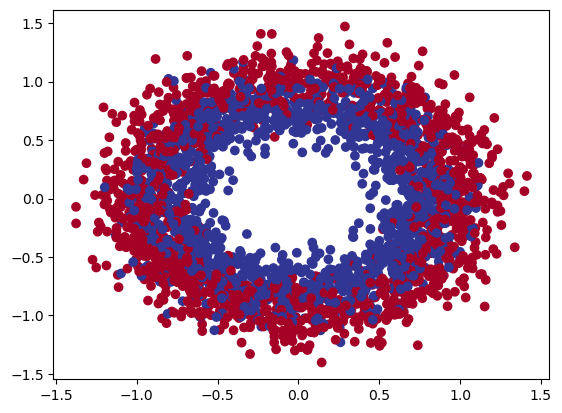

In [20]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu);

In [21]:
#EX1
print(f"Shape of X: {X.shape}")
print(f"Second dimension of X:{X.shape[1]}")
print(f"Printing the first 10 values of X:\n{X[:10]}")

Shape of X: torch.Size([3000, 2])
Second dimension of X:2
Printing the first 10 values of X:
tensor([[ 0.0470,  0.6750],
        [ 0.1261, -1.0087],
        [ 0.3886,  0.7199],
        [ 0.4397,  0.8657],
        [-0.4462, -0.7112],
        [ 0.0476, -0.8667],
        [ 1.0818, -0.0557],
        [-0.5864,  0.7695],
        [-0.2543,  1.3042],
        [-0.2103, -0.8275]])


In [22]:
#EX2_prep
from sklearn.model_selection import train_test_split
#Your code here

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

In [23]:
#EX2
import torch
import torch.nn as nn

class TwoLayerNetwork(nn.Module):
    def __init__(self):
        super(TwoLayerNetwork, self).__init__()
        self.f1 = nn.Linear(2, 5)
        self.f2 = nn.Linear(5, 1)

    def forward(self, x):
        x = self.f1(x)
        x = self.f2(x)
        return x
    
# create model instance
model2Layer = TwoLayerNetwork()

In [24]:
#equivalent
model_circle = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_circle

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [25]:
#ex4
# Define the loss function and optimizer
loss_fn = torch.nn.BCEWithLogitsLoss()  # Binary cross-entropy loss
optimizer = torch.optim.SGD(model2Layer.parameters(), lr=0.1)  # Stochastic gradient descent optimizer

In [37]:
from utils import plot_decision_boundary

X_test_output = model2Layer(X_test)
X_output = (X_test_output > 0.5).float()

accuracy_fn(y_test, X_output)

19700.0

Epoch [10/1000], Loss: 0.6964
Epoch [20/1000], Loss: 0.6957
Epoch [30/1000], Loss: 0.6953
Epoch [40/1000], Loss: 0.6950
Epoch [50/1000], Loss: 0.6948
Epoch [60/1000], Loss: 0.6946
Epoch [70/1000], Loss: 0.6944
Epoch [80/1000], Loss: 0.6942
Epoch [90/1000], Loss: 0.6941
Epoch [100/1000], Loss: 0.6939
Epoch [110/1000], Loss: 0.6938
Epoch [120/1000], Loss: 0.6937
Epoch [130/1000], Loss: 0.6936
Epoch [140/1000], Loss: 0.6935
Epoch [150/1000], Loss: 0.6935
Epoch [160/1000], Loss: 0.6934
Epoch [170/1000], Loss: 0.6933
Epoch [180/1000], Loss: 0.6932
Epoch [190/1000], Loss: 0.6932
Epoch [200/1000], Loss: 0.6931
Epoch [210/1000], Loss: 0.6931
Epoch [220/1000], Loss: 0.6931
Epoch [230/1000], Loss: 0.6930
Epoch [240/1000], Loss: 0.6930
Epoch [250/1000], Loss: 0.6929
Epoch [260/1000], Loss: 0.6929
Epoch [270/1000], Loss: 0.6929
Epoch [280/1000], Loss: 0.6929
Epoch [290/1000], Loss: 0.6928
Epoch [300/1000], Loss: 0.6928
Epoch [310/1000], Loss: 0.6928
Epoch [320/1000], Loss: 0.6928
Epoch [330/1000],

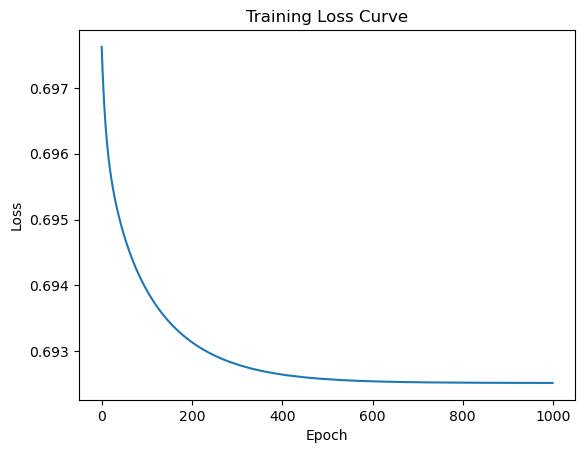

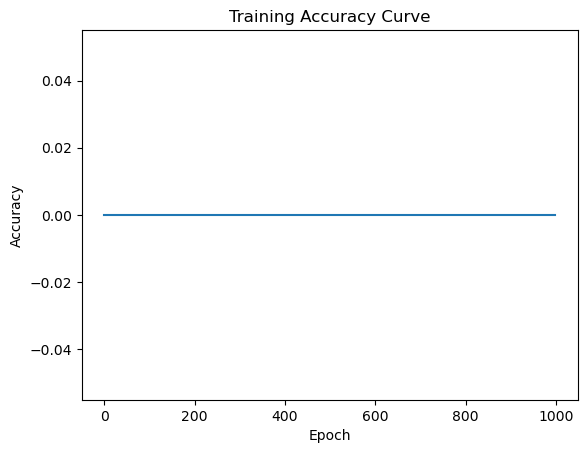

In [28]:
y_train = torch.reshape(y_train, (y_train.shape[0], 1))
y_test = torch.reshape(y_test, (y_test.shape[0], 1))

num_epochs = 1000
loss_curve = []
acc_curve = []
for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred = model2Layer(X_train)
    loss = loss_fn(y_pred, y_train)
    acc = accuracy_fn(y_train, y_pred)
    loss.backward()
    optimizer.step()
    # Print the loss every 10 epochs
    loss_curve.append(loss.item()) # This is so that we can look at an image of our loss
    acc_curve.append(acc)
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
        
# Plot the loss curve
from typing import List
def plot_loss(loss_values: List[float]):
    plt.plot(loss_values)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss Curve')
    plt.show()
plot_loss(loss_curve)

# Plot the accuracy curve
plt.plot(acc_curve)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Curve')
plt.show()

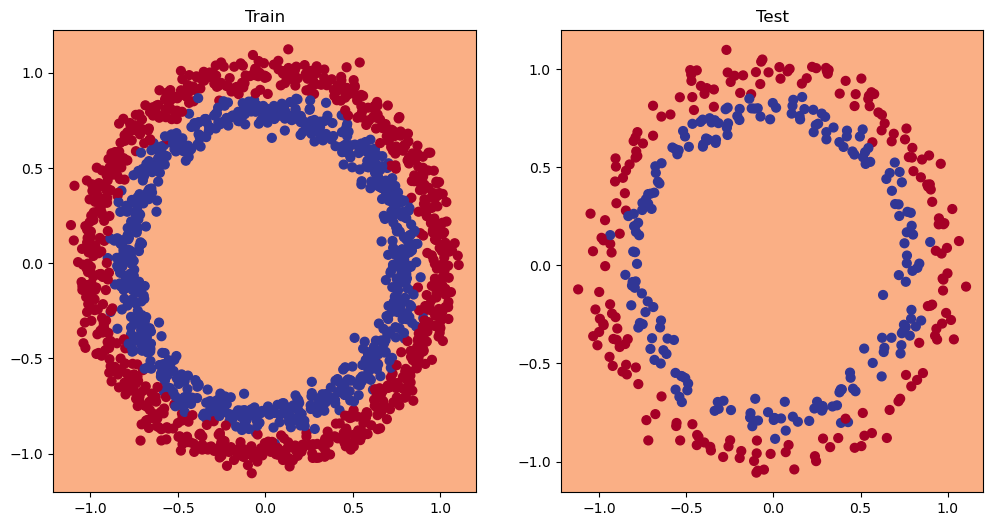

In [38]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_circle, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_circle, X_test, y_test)

In [30]:
# Create a toy tensor (similar to the data going into our model(s))
input_dummy = torch.arange(-10, 10, 1, dtype=torch.float32)
input_dummy

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

In [31]:
def relu(x):
  return torch.maximum(torch.tensor(0), x) # inputs must be tensors

# Pass toy tensor through ReLU function
relu(input_dummy)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

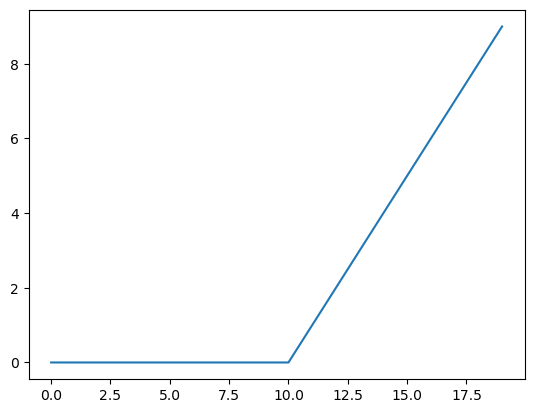

In [32]:
plt.plot(relu(input_dummy))

In [33]:
#ex6
import torch
import torch.nn as nn

class TwoLayerNetworkNonLinear(nn.Module):
    def __init__(self):
        super(TwoLayerNetworkNonLinear, self).__init__()
        self.fc1 = nn.Linear(2, 10)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x
# create model instance
model2LayerNonLinear = TwoLayerNetworkNonLinear()

Epoch [10/1000], Loss: 0.6990
Epoch [20/1000], Loss: 0.6978
Epoch [30/1000], Loss: 0.6971
Epoch [40/1000], Loss: 0.6967
Epoch [50/1000], Loss: 0.6963
Epoch [60/1000], Loss: 0.6959
Epoch [70/1000], Loss: 0.6956
Epoch [80/1000], Loss: 0.6953
Epoch [90/1000], Loss: 0.6950
Epoch [100/1000], Loss: 0.6948
Epoch [110/1000], Loss: 0.6945
Epoch [120/1000], Loss: 0.6942
Epoch [130/1000], Loss: 0.6940
Epoch [140/1000], Loss: 0.6937
Epoch [150/1000], Loss: 0.6935
Epoch [160/1000], Loss: 0.6933
Epoch [170/1000], Loss: 0.6930
Epoch [180/1000], Loss: 0.6928
Epoch [190/1000], Loss: 0.6926
Epoch [200/1000], Loss: 0.6923
Epoch [210/1000], Loss: 0.6921
Epoch [220/1000], Loss: 0.6919
Epoch [230/1000], Loss: 0.6916
Epoch [240/1000], Loss: 0.6914
Epoch [250/1000], Loss: 0.6911
Epoch [260/1000], Loss: 0.6909
Epoch [270/1000], Loss: 0.6907
Epoch [280/1000], Loss: 0.6904
Epoch [290/1000], Loss: 0.6902
Epoch [300/1000], Loss: 0.6899
Epoch [310/1000], Loss: 0.6896
Epoch [320/1000], Loss: 0.6894
Epoch [330/1000],

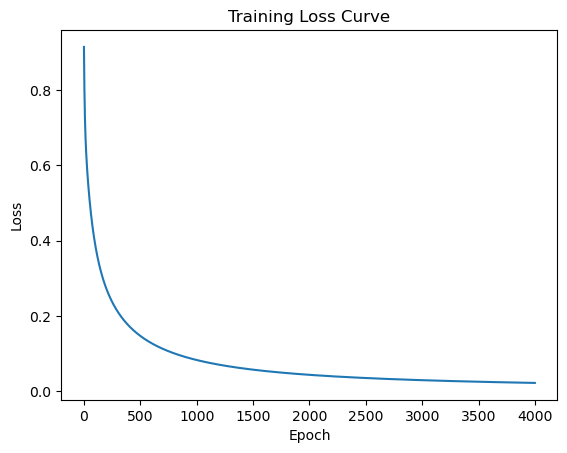

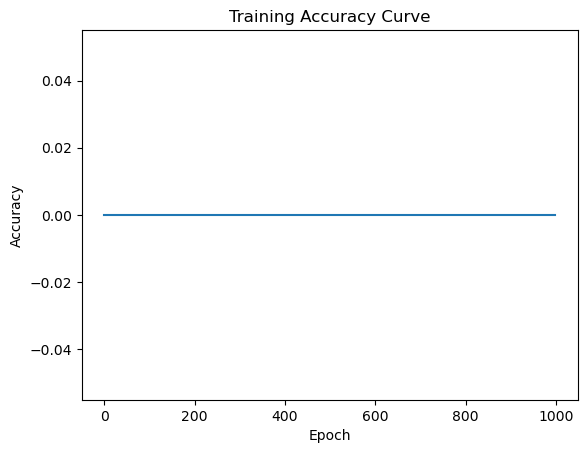

In [34]:
from sklearn.model_selection import train_test_split

n_samples = 2000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.05, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same values

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible


loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model2LayerNonLinear.parameters(), lr=0.1)

y_train = y_train.reshape(-1,1)
# y_test = torch.reshape(y_test, (y_test.shape[0], 1))

num_epochs = 1000
loss_curve = []
acc_curve = []
for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred = model2LayerNonLinear(X_train)
    loss = loss_fn(y_pred, y_train)
    acc = accuracy_fn(y_train, y_pred)
    loss.backward()
    optimizer.step()
    # Print the loss every 10 epochs
    loss_curve.append(loss.item()) # This is so that we can look at an image of our loss
    acc_curve.append(acc)
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
        
# Plot the loss curve
from typing import List
def plot_loss(loss_values: List[float]):
    plt.plot(loss_values)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss Curve')
    plt.show()
plot_loss(loss_values)

# Plot the accuracy curve
plt.plot(acc_curve)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Curve')
plt.show()

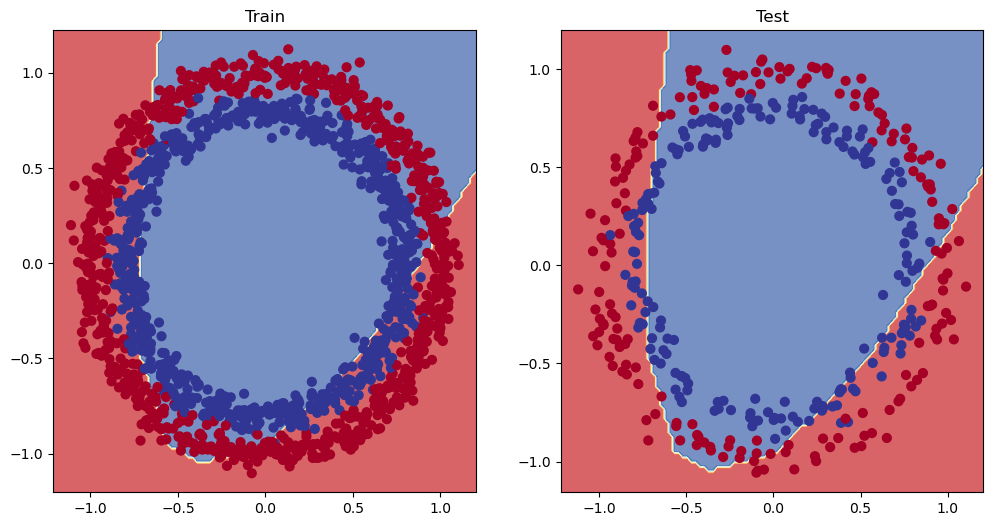

In [39]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model2LayerNonLinear, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model2LayerNonLinear, X_test, y_test)

tensor([[-0.0515,  0.4442],
        [ 1.0320, -0.4197],
        [ 0.8679, -0.2548],
        [ 0.2889, -0.4487],
        [-0.8334,  0.5351]]) tensor([1, 1, 1, 1, 0])


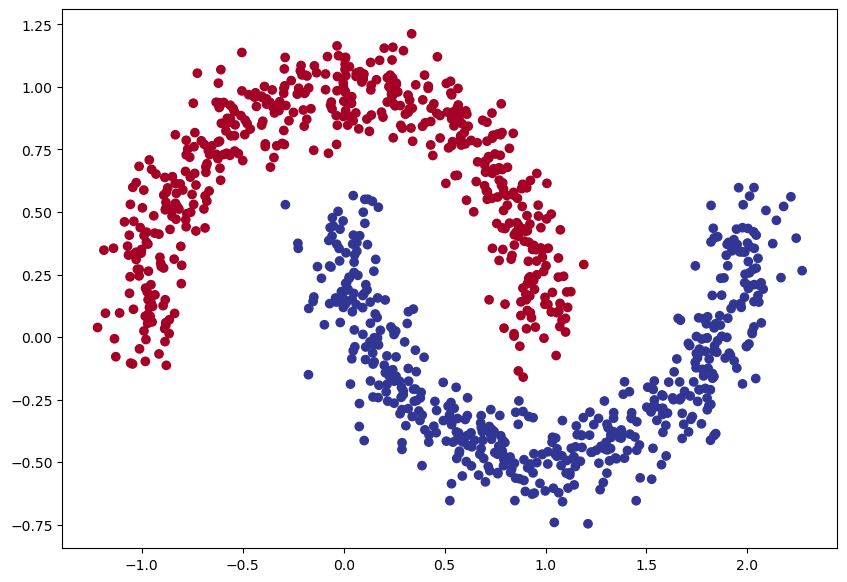

In [36]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data using make_moons
X_blob, y_blob = make_moons(n_samples=1000,
    noise=0.1, # added noise parameter instead of cluster_std
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)
plt.show()

In [40]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, y_multi = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

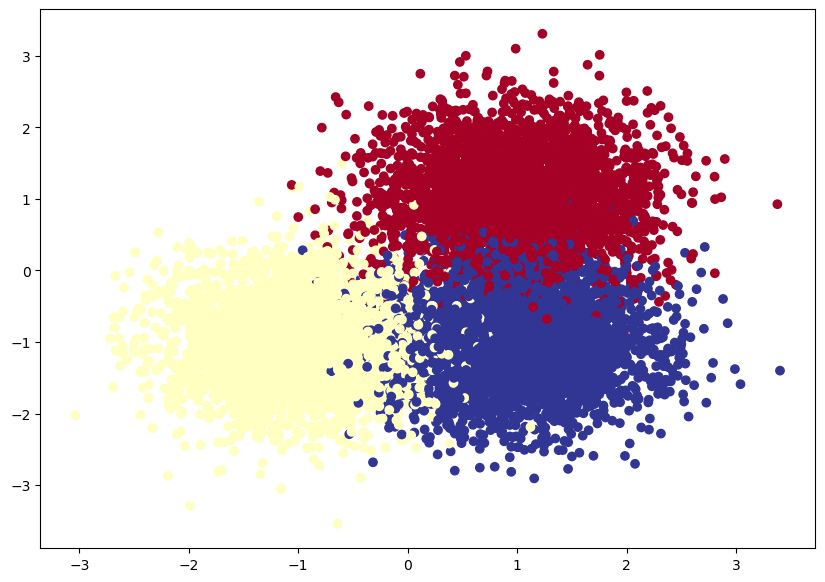

In [41]:

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y_multi, cmap=plt.cm.RdYlBu)
plt.show()